In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN


In [ ]:
import pandas as pd
import os

# Set the directory containing the CSV files
directory = 'features'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Initialize an empty data frame to store the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and append its data to the combined data frame
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    data = pd.read_csv(file_path)
    combined_data = combined_data.append(data, ignore_index=True) # type: ignore

# Write the combined data frame to a new CSV file
combined_data.to_csv('features_combined.csv', index=False)

In [6]:
df = pd.read_csv('features_combined.csv')
X=df.drop(['id', 'start','end','target'], axis=1)
y = df['target']

In [7]:
# Apply ADASYN oversampling to the entire dataset
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

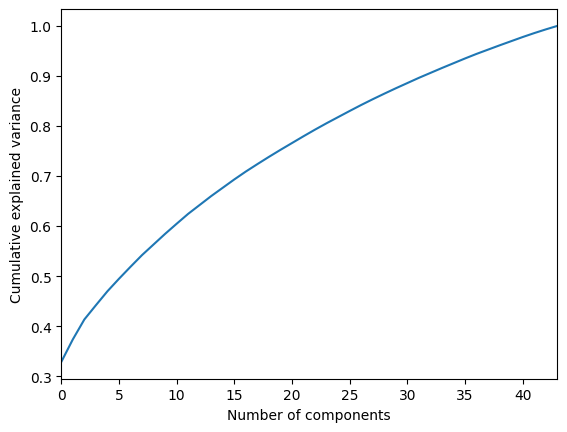

In [8]:
# create a PCA object with all components
pca = PCA()

# fit the data to the PCA object
pca.fit(X_resampled)

# plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim((0,43))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [9]:
# Apply PCA to the resampled dataset
pca = PCA(n_components=43)
X_pca = pca.fit_transform(X_resampled)


In [10]:
df_reduced = pd.DataFrame(X_pca)
df_reduced['target'] = y_resampled
df_reduced.to_csv('reduced_data.csv', index=False)

In [ ]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

def balance_data(X, y):
    """
    Balances a dataset by undersampling the majority class using the RandomUnderSampler algorithm.
    
    Parameters:
        X (numpy array): The feature data.
        y (numpy array): The target data.
        
    Returns:
        X_resampled (numpy array): The resampled feature data.
        y_resampled (numpy array): The resampled target data.
    """
    # Determine the class distribution
    class_counts = np.bincount(y)
    print(class_counts)
    
    # Determine the majority class label
    majority_class = np.argmax(class_counts) # type: ignore
    
    # Determine the number of samples to remove from the majority class
    n_samples = class_counts.min()
    
    # Undersample the majority class using the RandomUnderSampler algorithm
    rus = RandomUnderSampler(sampling_strategy={majority_class: n_samples}, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y) # type: ignore
    
    return X_resampled, y_resampled